![names.jpg](names.jpg)

### Table Of Content:

    1- Goal Of Collecting Dataset. 
    2- Source of Dataset. 
    3- General Information about Dataset:
        a. number and type of variables. 
        b. number of observation. 
        c. number of labels.
    4- Summary of Dataset:
        a. sample of raw. 
        b. variables distribution.
        c. missing values. 
        d. statistical summaries. 
    5- Preprocessing Technique Used. 
  **Supervised Learning**
  
    6- Prepare Data For Modeling.
    7- Prediction.
    8- Classification Model Selection:
        a. Logistic Regfression.
        b. Decision Tree Classifier.
        c. Support Vector Classifier.
    9- Classification Model Comparision.
    
    

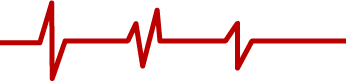
> ## 1- Goal of collecting Dataset:

   Utilizing a stroke dataset for a machine learning (ML) project offers the opportunity to harness the power of data-driven insights to address key aspects of stroke prevention, diagnosis, and treatment. 

   By employing ML algorithms and techniques, We can develop predictive models to identify individuals at risk of stroke, improve diagnostic accuracy, and optimize treatment recommendations. Additionally, the dataset can serve as a valuable resource for feature engineering, training and testing ML models, and evaluating their performance. 
    
   The ultimate goal is to create tools and solutions that can positively impact stroke patients' lives by enabling earlier intervention and better healthcare decisions based on data-driven insights.

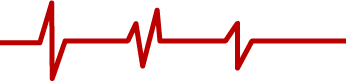
> ## 2- Source of Dataset:

  According to the World Health Organization (WHO), stroke stands as the second leading cause of death worldwide, accounting for approximately 11% of total deaths.This alarming prevalence underscores the significance of our selection of the 'Stroke Prediction Dataset'.

  The "Stroke Prediction Dataset" is a valuable resource available on Kaggle, a popular platform for data science and machine learning enthusiasts. This dataset is utilized to forecast the likelihood of a patient experiencing a stroke by considering input parameters such as gender, age, various diseases, and smoking status. Each data entry in the dataset offers pertinent information about the patient.

here is the link of the dataset: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data


..

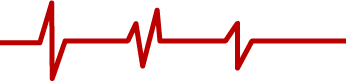
> ## 3- General Information about Dataset:

First, we'll import libraries then read CSV file. 

In [1]:
pip install missingno

  Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/ad/00/adb57a4974931c97a9bbbc92fd2cc998aa47569fcd7fb65ded4b81b72455/numpy-1.26.1-cp312-cp312-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 503.9 kB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/a0/68/87ae804c1b639d1102ead5f674ab48a1fc9ca22e67cd02b0909f3917e321/matplotlib-3.8.1-cp312-cp312-macosx_10_12_x86_64.whl.metadata
  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/e5/ee/c5bc0d4b66a9c38165adf86e8b57be6f76868edf5ea23b3bbee3680e7edf/scipy-1.11.3-cp312-cp312-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.4 MB/s eta 0:00:00
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352b

In [1]:
import import_ipynb

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
#from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('healthcare-dataset-stroke-data.csv')

**a. number and type of variables:**

we have 11 variables which are:    
    
    1. id: unique identifier as int.
    
    2. gender: "Male", "Female" or "Other" as object.
        
    3. age: age of the patient as float.
    
    4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension as int.

    5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease as int.

    6. ever_married: "No" or "Yes" as object.

    7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" as object.

    8. Residence_type: "Rural" or "Urban" as object.

    9. avg_glucose_level: average glucose level in blood as float.

    10. bmi: body mass index as float.

    11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"* as object.


*Note: "Unknown" in smoking_status means that the information is unavailable for this patient.

As an output, there is:
stroke: 1 if the patient had a stroke or 0 if not as int.

**b. number of observation:**

In [2]:
df.shape

(5110, 12)

There exists 5110 instances of observation.

**c. number of labels:**

the lables are: 
has a stroke = 1 or No stroke = 0.

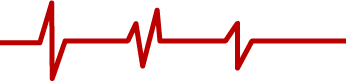
> ## 4- Summary of Dataset:

**a. sample of raw data.**

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**b. variables distribution:**

we'll take about (Gender, Hypertension, Heart disease, Married, Work Type, Residence type, Smoking status, Stroke), others ( Gender, Average glucose level, BMI ) will be disscussed in the statistical part.

> **1.Gender:**

In [5]:
print (f'{round(df["gender"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="gender", title='Gender', width=400, height=400)
fig.show()

gender
Female    58.59
Male      41.39
Other      0.02
Name: proportion, dtype: float64


> **2.Hypertension:**

In [6]:
print (f'{round(df["hypertension"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="hypertension", title='hypertension', width=400, height=400)
fig.show()

hypertension
0    90.25
1     9.75
Name: proportion, dtype: float64


> **3. Heart Disease:**

In [7]:
print (f'{round(df["heart_disease"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="heart_disease", title='heart_disease', width=400, height=400)
fig.show()

heart_disease
0    94.6
1     5.4
Name: proportion, dtype: float64


> **4. Married:**

In [8]:
print (f'{round(df["ever_married"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="ever_married", title='ever_married', width=400, height=400)
fig.show()

ever_married
Yes    65.62
No     34.38
Name: proportion, dtype: float64


> **5. Work Type:**

In [9]:
print (f'{round(df["work_type"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="work_type", title='work_type', width=400, height=400)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

work_type
Private          57.24
Self-employed    16.03
children         13.44
Govt_job         12.86
Never_worked      0.43
Name: proportion, dtype: float64


> **6. Residence Type:**

In [10]:
print (f'{round(df["Residence_type"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="Residence_type", title='Residence_type', width=400, height=400)
fig.show()

Residence_type
Urban    50.8
Rural    49.2
Name: proportion, dtype: float64


> **7. Smoking Status:**

In [11]:
print (f'{round(df["smoking_status"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="smoking_status", title='smoking_status', width=400, height=400)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

smoking_status
never smoked       37.03
Unknown            30.22
formerly smoked    17.32
smokes             15.44
Name: proportion, dtype: float64


> **8. Stroke:**

In [12]:
fig = px.histogram(df, x="stroke", title='Stroke', width=400, height=400)
fig.show()

# 0 means No Stroke, 1 means Stroke

**c. missing values:**

In [13]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
bmi,201,0.039335
id,0,0.000000
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000


> **1. BMI:**

We have missing values on the 'bmi', which is at around %4.
We will handle it in the Preprocessing part.

**d. statistical summaries with mean and variance:**

> **1. Categorical:**

In [14]:
#we divide the implementation since type of Hypertension and Heart disease are int, others where object(String)
categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
'work_type', 'Residence_type', 'smoking_status']

df[categorical].describe()

,hypertension,heart_disease
count,5110.000000,5110.000000
mean,0.097456,0.054012
std,0.296607,0.226063
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [15]:
cl = list(df.dtypes[df.dtypes == 'object'].index)
df[cl].describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


> **2. Numerical:**

In [16]:
numerical = ['age','avg_glucose_level', 'bmi']
df[numerical].describe()


,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


In [17]:
#variance of numerical data:
print( df[numerical].var() )

age                   511.331792
avg_glucose_level    2050.600820
bmi                    61.686364
dtype: float64


We have three numerical features in our dataset.

All of our numerical features are measured in different scales.

Many machine learning algorithms perform better standard range scaled numerical variables (such as Linear models,artificial neural networks, K-nearest Neighbors,support vector machines, etc.)

Tree models (such as, decision trees,random forest, etc.) work fine with different range numerical features.

let's see the Skewness.

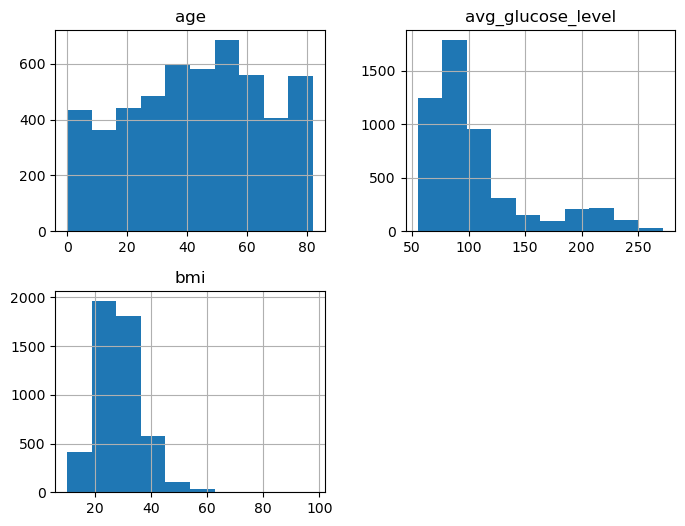

In [18]:
df[numerical].skew()

df[numerical].hist(figsize=(8,6));

Based on the result, age has slight left skew, other two features have right tail, positively skewed shape distribution.

For that reason we will standardize the raw data and then apply Yoe-Johnson transform method in Ph2.

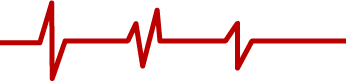
> ## 5- Preprocessing Technique Used.

> 1. Variable Removal for ID:

there is no need for ID since it not relevant or effect the prediction of having a stroke or not. So, we will remove it.

In [19]:
df = df.drop('id', axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


> 2. Missing Value of BMI:

we will solve the problem by using mean imputation, we can see in the graph that no messing values exist.

In [20]:
df['bmi'].fillna(df['bmi'].mean(), inplace = True)
#Checking Missing Values after imputing
display(df.isnull().sum().to_frame().reset_index().rename({'index' : 'Variables', 0: 'Missing Values'}, axis =1).style.background_gradient('copper_r'))

,Variables,Missing Values
0,gender,0
1,age,0
2,hypertension,0
3,heart_disease,0
4,ever_married,0
5,work_type,0
6,Residence_type,0
7,avg_glucose_level,0
8,bmi,0
9,smoking_status,0


> 3. Unusual Category Removal:

we have Unknown category in Smoking status that should be removed.

In [21]:
#Dropping the unusual category from the dataset
df.drop(df.loc[df['smoking_status']=='Unknown'].index, inplace=True)
df.shape

(3566, 11)

In [24]:
#Resetting index after Records Removal
df.reset_index(drop=True)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
3561,Female,57.0,0,0,Yes,Private,Rural,77.93,21.700000,never smoked,0
3562,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
3563,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
3564,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0


> 4. Cleaning Categorical Data: White Space Removal and unified style of letters:

In [22]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)
categorical
for col in categorical:
    df[col] = df[col].str.lower().str.replace(" ", "_")

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,male,67.0,0,1,yes,private,urban,228.69,36.600000,formerly_smoked,1
1,female,61.0,0,0,yes,self-employed,rural,202.21,28.893237,never_smoked,1
2,male,80.0,0,1,yes,private,rural,105.92,32.500000,never_smoked,1
3,female,49.0,0,0,yes,private,urban,171.23,34.400000,smokes,1
4,female,79.0,1,0,yes,self-employed,rural,174.12,24.000000,never_smoked,1


here, we remove spaces and unified style of strings to be small and _ between words.

> 5. Checking for duplicate rows:

In [23]:
display("Total number of of Duplicates present in data: %s" %df.duplicated().sum())

'Total number of of Duplicates present in data: 0'

So, there are no diplication in our dataset. 

> 6. checking wether data is balance or not:

In [24]:
#Checking if the dataset is balanced or not
df.stroke.value_counts()

stroke
0    3364
1     202
Name: count, dtype: int64

In [25]:

fig = px.histogram(df, x="stroke", title='Stroke', width=400, height=400)
fig.show()

we can see that data set is highly imbalanced, where only 249 from 5110.. It is better to resample the dataset to make it balanced and for proper prediction using oversampling.

In [26]:
from sklearn.utils import resample

# Separate Target Classes
df_1 = df[df.stroke==0]
df_2 = df[df.stroke==1]
 
# Upsample minority class
df_2_upsampled = resample(df_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=3364,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_1, df_2_upsampled])
 
# Display new class counts
df_upsampled.stroke.value_counts()


stroke
0    3364
1    3364
Name: count, dtype: int64

In [28]:
df_upsampled.reset_index(drop=True)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,male,58.0,1,0,yes,private,urban,87.96,39.2,never_smoked,0
1,female,70.0,0,0,yes,private,rural,69.04,35.9,formerly_smoked,0
2,female,52.0,0,0,yes,private,urban,77.59,17.7,formerly_smoked,0
3,female,75.0,0,1,yes,self-employed,rural,243.53,27.0,never_smoked,0
4,female,32.0,0,0,yes,private,rural,77.67,32.3,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...
6723,female,70.0,0,1,yes,private,rural,239.07,26.1,never_smoked,1
6724,female,57.0,1,0,yes,govt_job,rural,67.41,32.9,never_smoked,1
6725,male,78.0,0,0,yes,self-employed,urban,116.10,27.1,never_smoked,1
6726,male,59.0,0,0,yes,private,urban,86.23,30.0,formerly_smoked,1


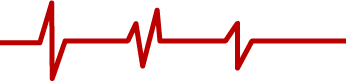
> ## Phase 2:
> ## Supervised Learning

Supervised learning is a fundamental branch of machine learning where models are trained on labeled datasets, with each data point having a corresponding known target variable or "label." The main objective of supervised learning is to develop a mapping function that relates the input features to the target variable. This learned function can then be applied to make predictions for new, unseen data.

The typical process of supervised learning involves splitting the labeled dataset into two subsets: a training set and a testing set. The training set is employed to train the model, allowing it to learn and adapt to the relationships within the data. After training, the model's performance is evaluated using the testing set, helping to assess its ability to generalize to unseen data and guiding any necessary adjustments to its parameters.

Once a supervised learning model has been adequately trained and tested, it becomes a valuable tool for making predictions on new, previously unseen data.

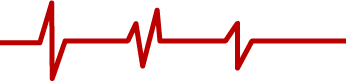
> ## 6- Prepare Data For Modeling

First we need to prepare data for modeling by removing any outliers:

In [27]:
#OUTLIER DETECTION in CROP
#Function to calc lowerRange and UpperRange using 1.5IQR rule
def outlier(data1):
    #Sort in Ascending
    sorted(data1)
    #Q1 and Q3
    Q1,Q3 = np.nanpercentile(data1, [25,75])
    #Calc IQR
    IQR = Q3 - Q1
    #Calc lowerRange
    lowerRange = Q1 - (1.5 * IQR)
    #Calc upperRange
    upperRange = Q3 + (1.5 * IQR)
    #Return Ranges
    return lowerRange,upperRange

 > Checking how outlier removal affected dataset:

In [28]:
df_upsampled.value_counts('stroke')

stroke
0    3364
1    3364
Name: count, dtype: int64

Distribution for important Stroke Features before removing ouliers:

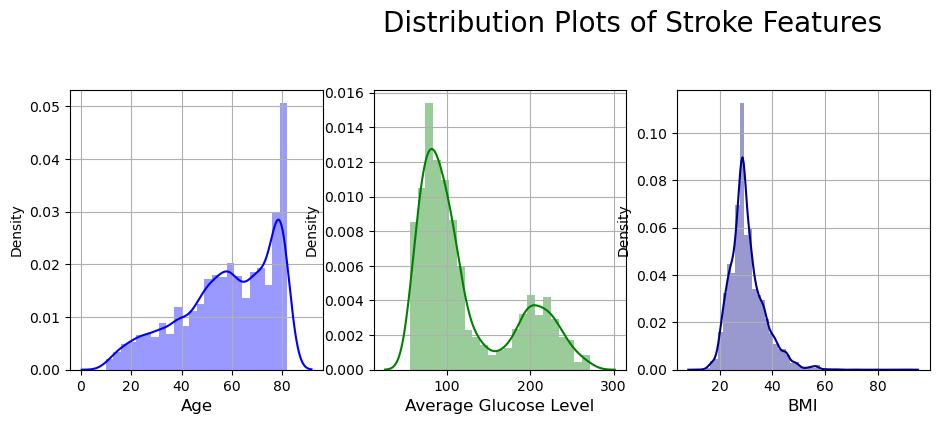

In [30]:
plt.figure(figsize=(15,8))
plt.subplot(2,4,1)
sns.distplot(df_upsampled['age'],color = 'blue')
plt.xlabel('Age',fontsize = 12)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(df_upsampled['avg_glucose_level'],color = 'green')
plt.xlabel('Average Glucose Level',fontsize = 12)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(df_upsampled['bmi'],color = 'darkblue')
plt.xlabel('BMI',fontsize = 12)
plt.grid()

plt.suptitle('Distribution Plots of Stroke Features', fontsize = 20)
plt.show()

> Checking the outliers considering all classes of the output for each numerical column:

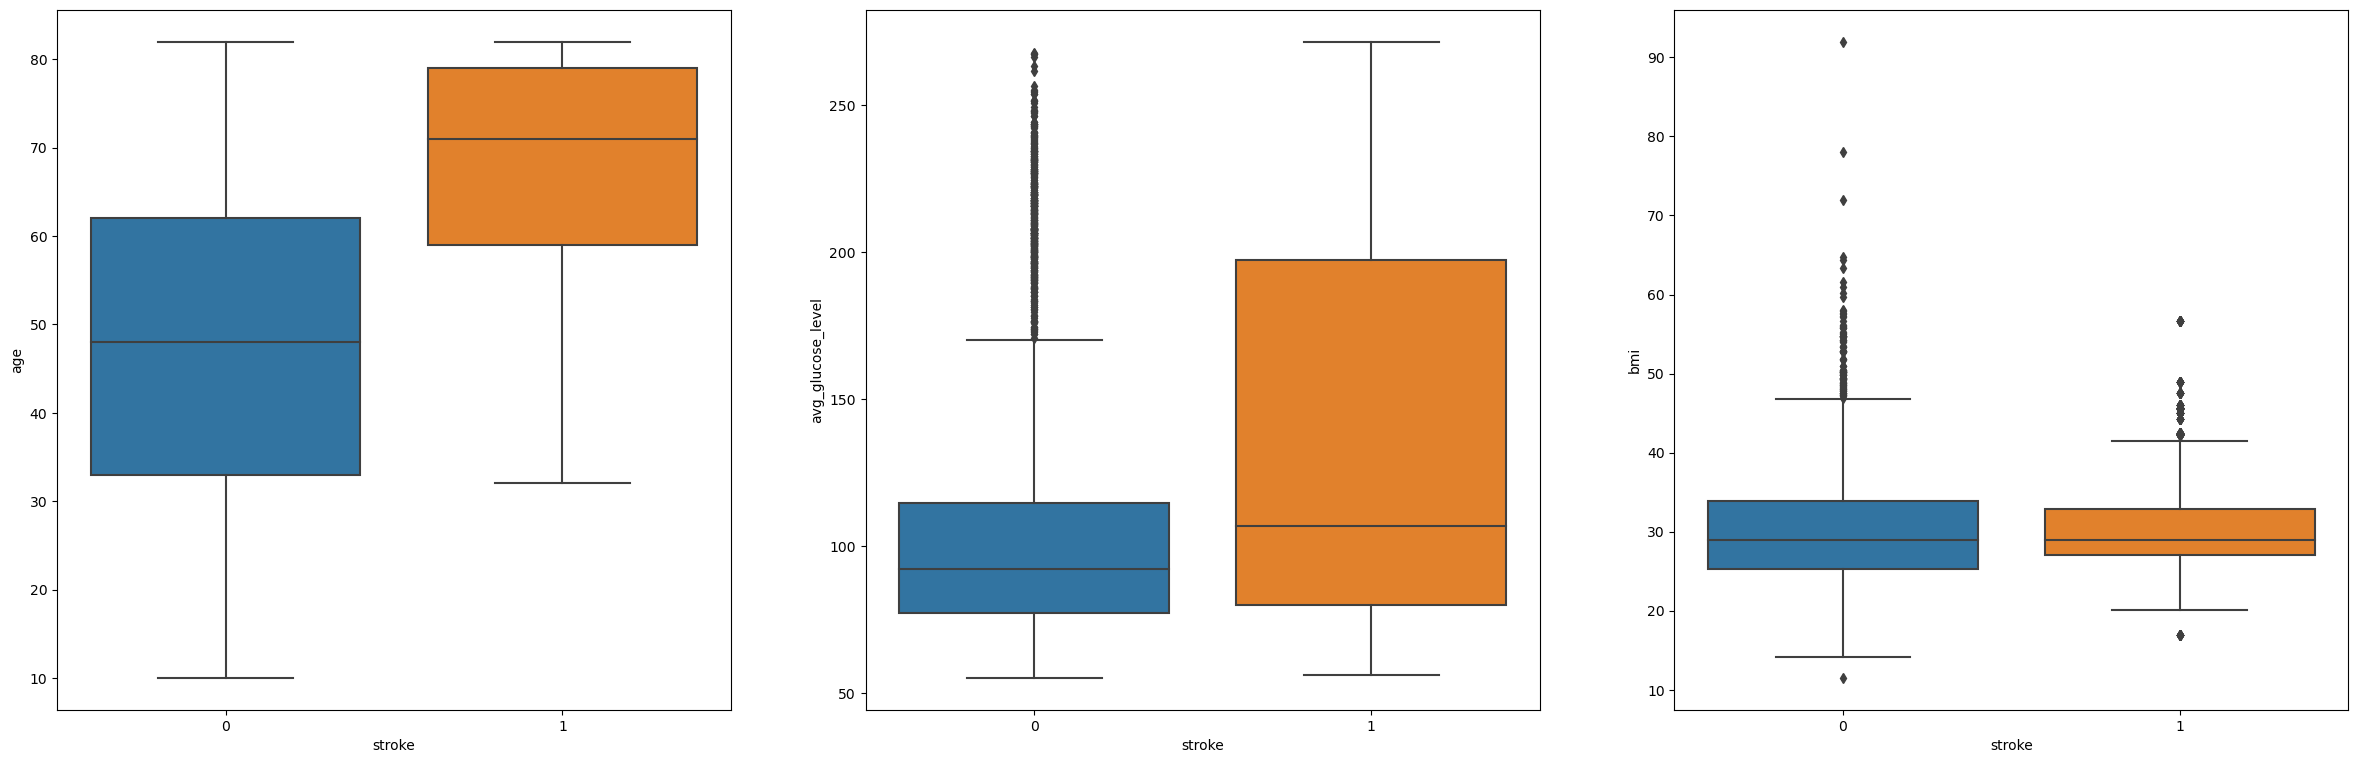

In [31]:
def graph(y):
    sns.boxplot(x="stroke", y=y, data=df_upsampled)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('age')
  
plt.subplot(2,4,2)
graph('avg_glucose_level')
  
plt.subplot(2,4,3)
graph('bmi')
  
plt.show()

In [32]:
lr,ur=outlier(df_upsampled['avg_glucose_level'][df_upsampled.stroke==0])
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level > ur) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level < lr) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.value_counts('stroke')

stroke
1    3364
0    2916
Name: count, dtype: int64

In [33]:
lr,ur=outlier(df_upsampled['avg_glucose_level'][df_upsampled.stroke==0])
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level > ur) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level < lr) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.value_counts('stroke')

stroke
1    3364
0    2831
Name: count, dtype: int64

In [34]:
lr,ur=outlier(df_upsampled['bmi'][df_upsampled.stroke==1])
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi > ur) & (df_upsampled.stroke == 1)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi < lr) & (df_upsampled.stroke == 1)],inplace=True)
df_upsampled.value_counts('stroke')

stroke
1    3177
0    2831
Name: count, dtype: int64

In [35]:
lr,ur=outlier(df_upsampled['bmi'][df_upsampled.stroke==1])
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi > ur) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi < lr) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.value_counts('stroke')

stroke
1    3177
0    2499
Name: count, dtype: int64

Checking the outliers considering all classes of the output for each column:

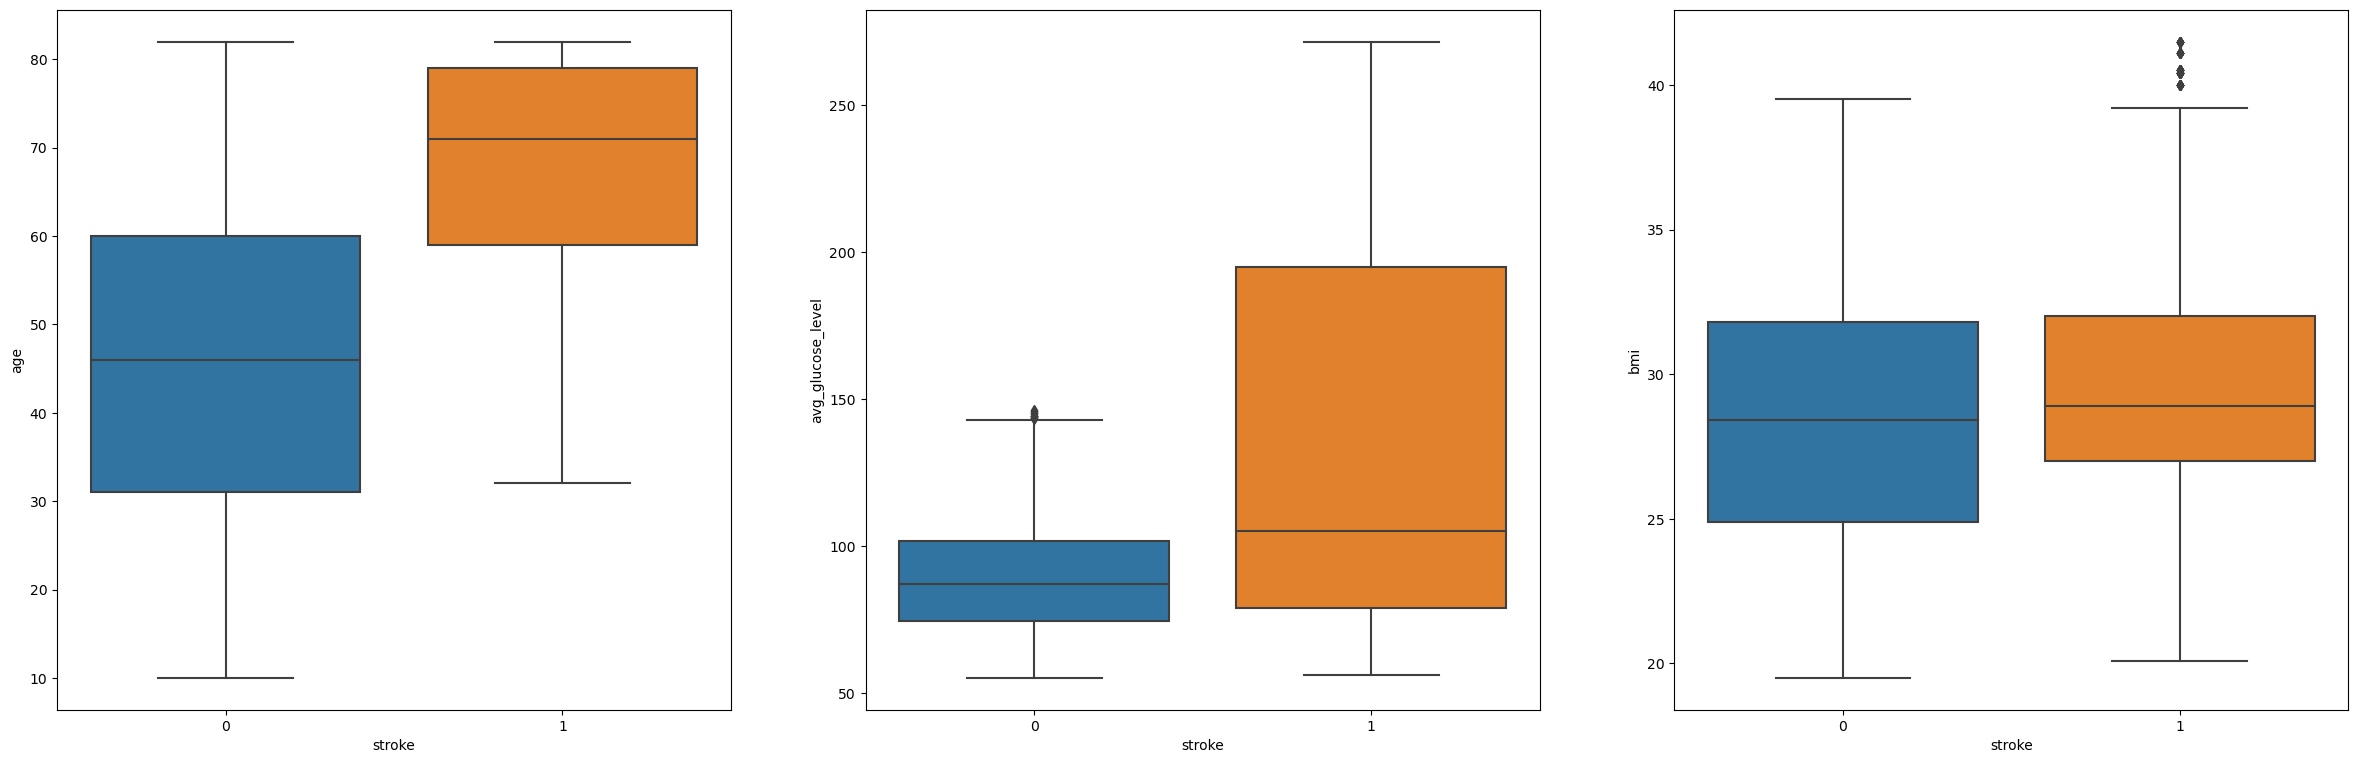

In [36]:
def graph(y):
    sns.boxplot(x="stroke", y=y, data=df_upsampled)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('age')
  
plt.subplot(2,4,2)
graph('avg_glucose_level')
  
plt.subplot(2,4,3)
graph('bmi')
  
plt.show()

In [37]:
lr,ur=outlier(df_upsampled['bmi'][df_upsampled.stroke==1])
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi > ur) & (df_upsampled.stroke == 1)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi < lr) & (df_upsampled.stroke == 1)],inplace=True)
df_upsampled.value_counts('stroke')

stroke
1    3076
0    2499
Name: count, dtype: int64

In [38]:
lr,ur=outlier(df_upsampled['avg_glucose_level'][df_upsampled.stroke==0])
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level > ur) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level < lr) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.value_counts('stroke')

stroke
1    3076
0    2477
Name: count, dtype: int64

Checking the outliers considering all classes of the output for each column:

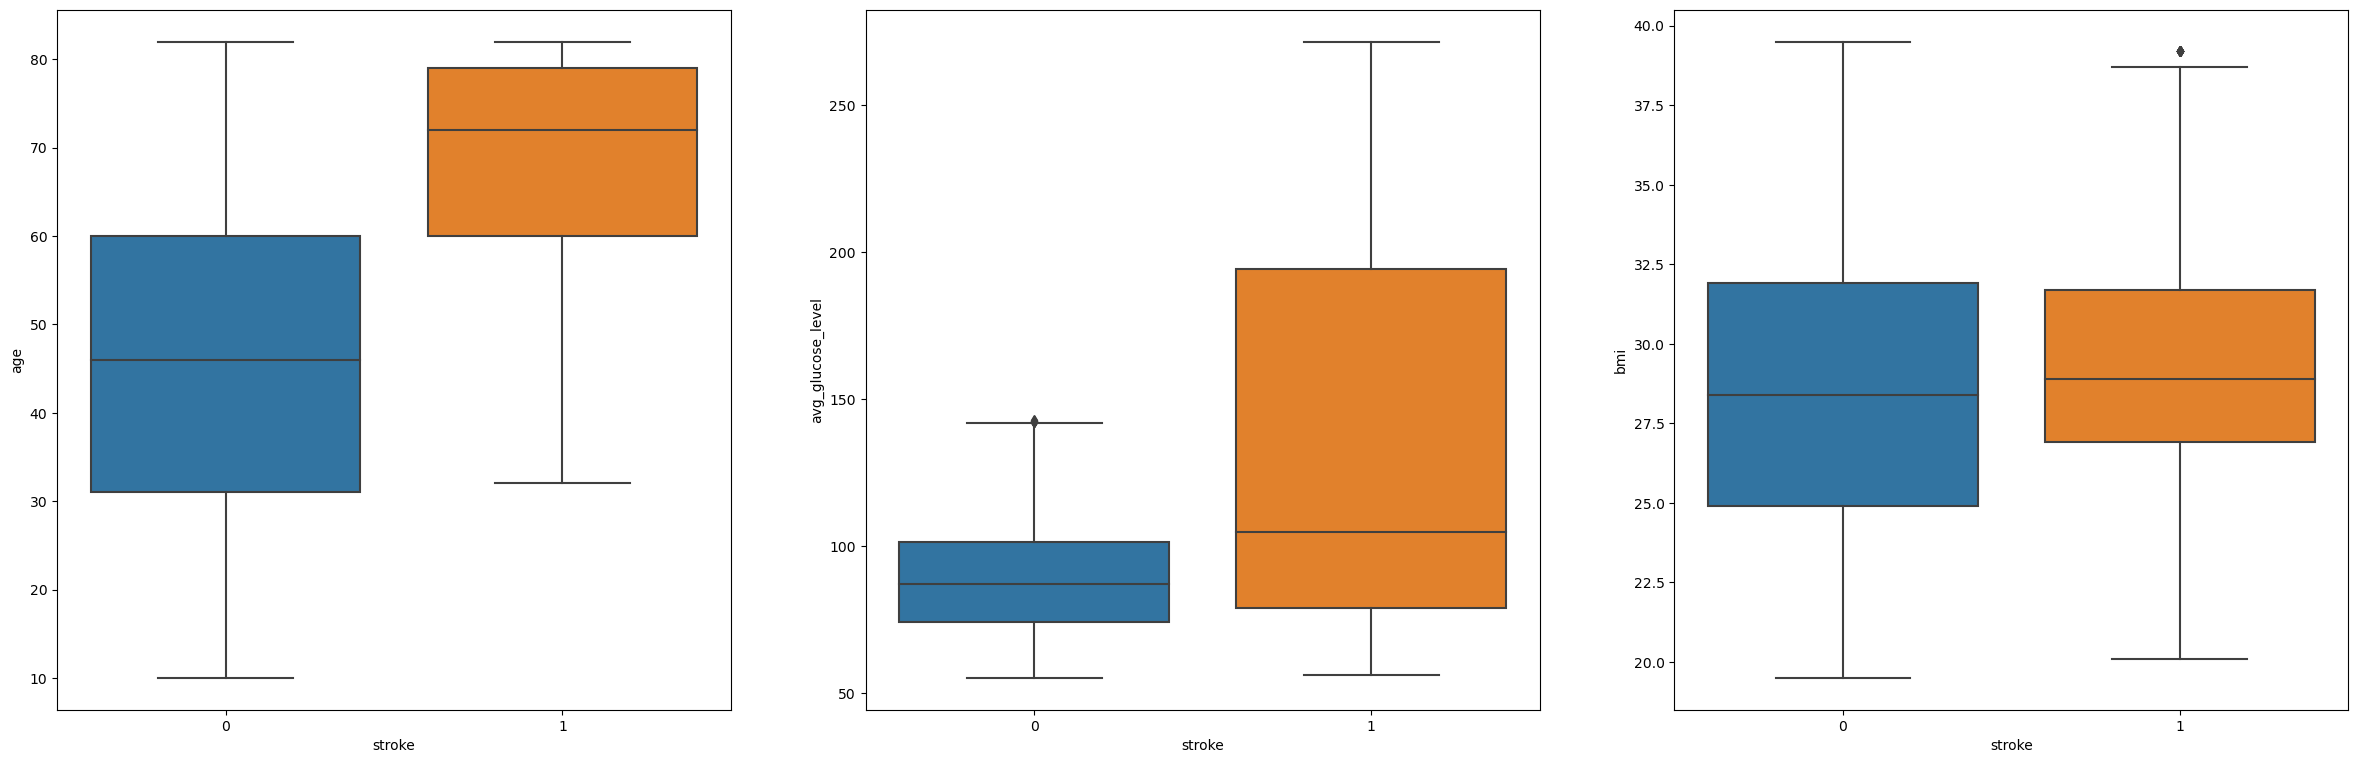

In [39]:
def graph(y):
    sns.boxplot(x="stroke", y=y, data=df_upsampled)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('age')
  
plt.subplot(2,4,2)
graph('avg_glucose_level')
  
plt.subplot(2,4,3)
graph('bmi')
  
plt.show()

In [40]:
lr,ur=outlier(df_upsampled['avg_glucose_level'][df_upsampled.stroke==0])
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level > ur) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.avg_glucose_level < lr) & (df_upsampled.stroke == 0)],inplace=True)
df_upsampled.value_counts('stroke')

stroke
1    3076
0    2470
Name: count, dtype: int64

In [41]:
lr,ur=outlier(df_upsampled['bmi'][df_upsampled.stroke==1])
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi > ur) & (df_upsampled.stroke == 1)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.bmi < lr) & (df_upsampled.stroke == 1)],inplace=True)
df_upsampled.value_counts('stroke')

stroke
1    3057
0    2470
Name: count, dtype: int64

Checking the outliers considering all classes of the output for each column

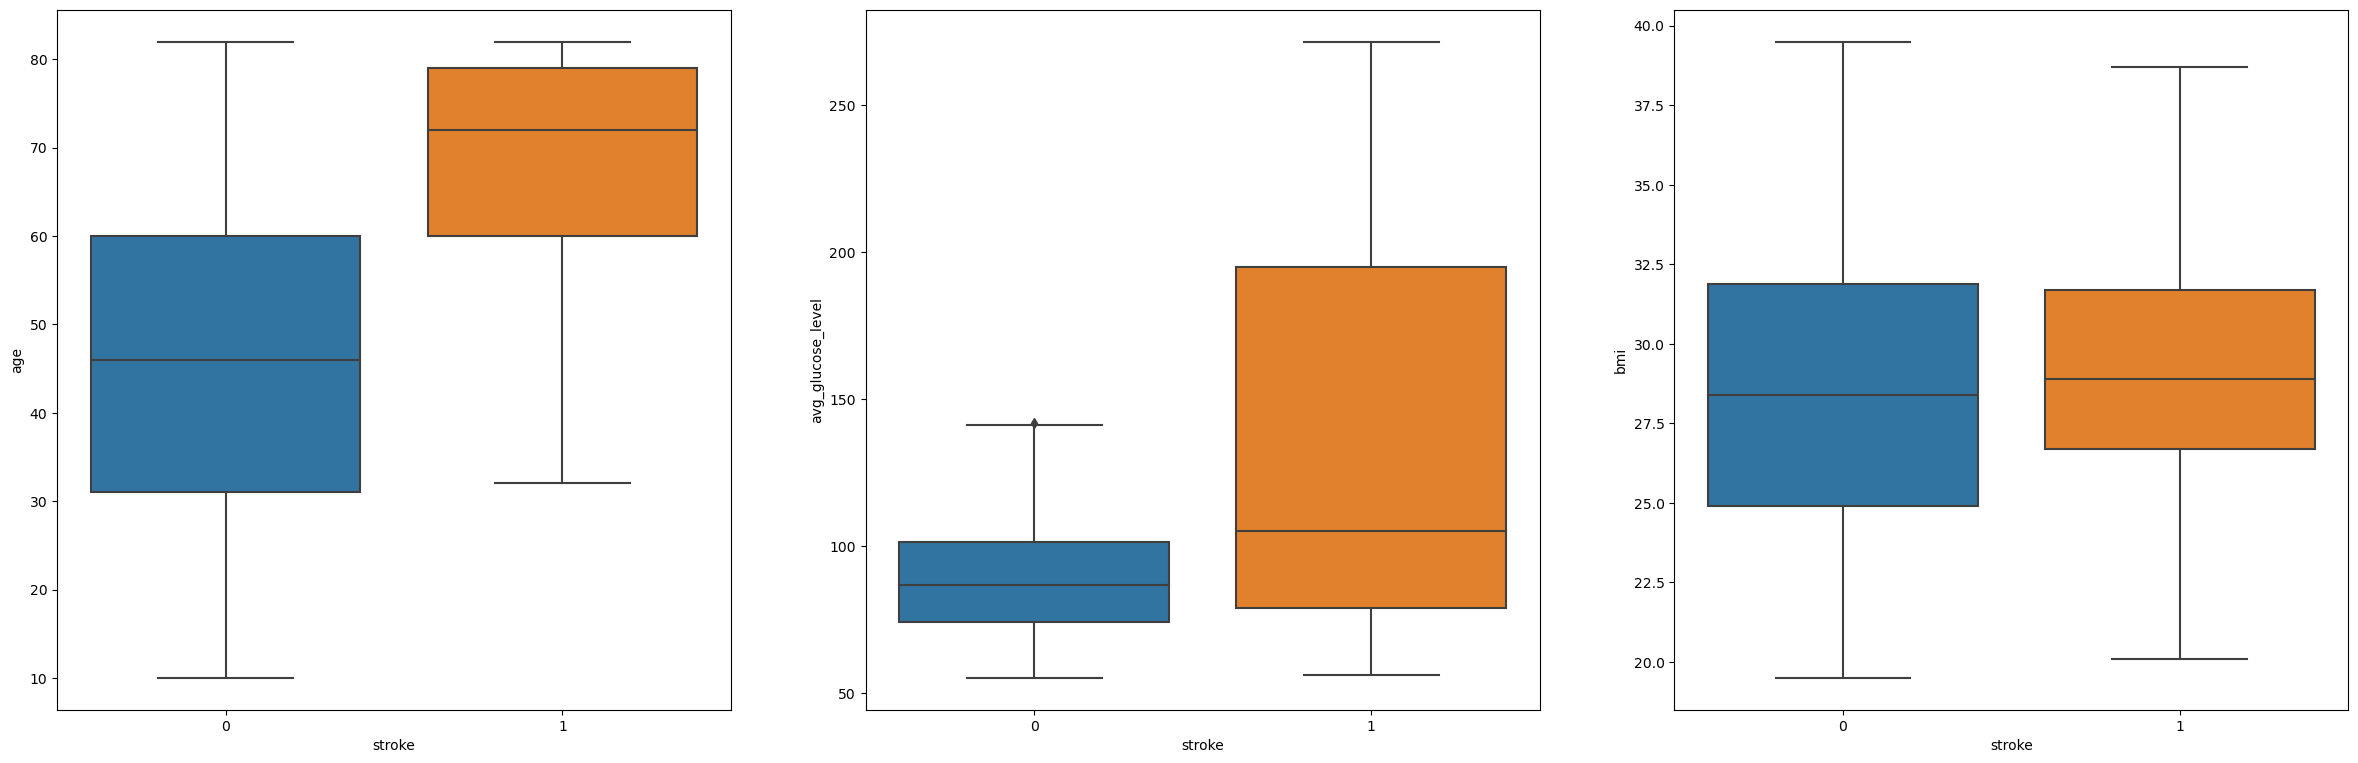

In [42]:
def graph(y):
    sns.boxplot(x="stroke", y=y, data=df_upsampled)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('age')
  
plt.subplot(2,4,2)
graph('avg_glucose_level')
  
plt.subplot(2,4,3)
graph('bmi')

Distribution for important Stroke Features after outlier removal:

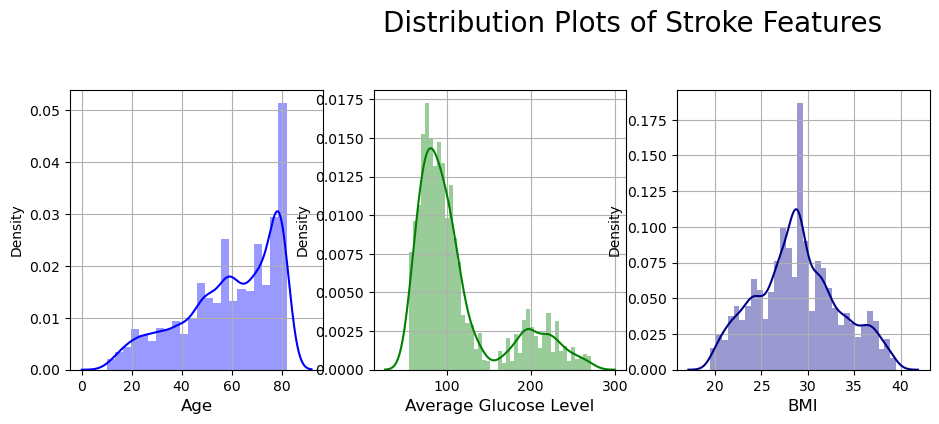

In [43]:
plt.figure(figsize=(15,8))
plt.subplot(2,4,1)
sns.distplot(df_upsampled['age'],color = 'blue')
plt.xlabel('Age',fontsize = 12)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(df_upsampled['avg_glucose_level'],color = 'green')
plt.xlabel('Average Glucose Level',fontsize = 12)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(df_upsampled['bmi'],color = 'darkblue')
plt.xlabel('BMI',fontsize = 12)
plt.grid()

plt.suptitle('Distribution Plots of Stroke Features', fontsize = 20)
plt.show()

We can see that after removal of outlier, the distribution of columns is less skewed now and forms kind of bell shaped curve

Resetting the index after outlier removal:

In [44]:
df_upsampled.reset_index(drop=True,inplace=True)
df_upsampled

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,male,58.0,1,0,yes,private,urban,87.96,39.2,never_smoked,0
1,female,70.0,0,0,yes,private,rural,69.04,35.9,formerly_smoked,0
2,female,32.0,0,0,yes,private,rural,77.67,32.3,smokes,0
3,male,79.0,0,1,yes,private,urban,57.08,22.0,formerly_smoked,0
4,female,37.0,0,0,yes,private,rural,73.50,26.1,formerly_smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
5522,female,70.0,0,1,yes,private,rural,239.07,26.1,never_smoked,1
5523,female,57.0,1,0,yes,govt_job,rural,67.41,32.9,never_smoked,1
5524,male,78.0,0,0,yes,self-employed,urban,116.10,27.1,never_smoked,1
5525,male,59.0,0,0,yes,private,urban,86.23,30.0,formerly_smoked,1


> Performing One Hot Encoding for the Categorical Columns:

In [45]:
final=pd.get_dummies(df_upsampled, columns=['gender','ever_married','work_type','Residence_type','smoking_status'])
final

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_female,gender_male,ever_married_no,ever_married_yes,work_type_children,work_type_govt_job,work_type_never_worked,work_type_private,work_type_self-employed,Residence_type_rural,Residence_type_urban,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,58.0,1,0,87.96,39.2,0,False,True,False,True,False,False,False,True,False,False,True,False,True,False
1,70.0,0,0,69.04,35.9,0,True,False,False,True,False,False,False,True,False,True,False,True,False,False
2,32.0,0,0,77.67,32.3,0,True,False,False,True,False,False,False,True,False,True,False,False,False,True
3,79.0,0,1,57.08,22.0,0,False,True,False,True,False,False,False,True,False,False,True,True,False,False
4,37.0,0,0,73.50,26.1,0,True,False,False,True,False,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5522,70.0,0,1,239.07,26.1,1,True,False,False,True,False,False,False,True,False,True,False,False,True,False
5523,57.0,1,0,67.41,32.9,1,True,False,False,True,False,True,False,False,False,True,False,False,True,False
5524,78.0,0,0,116.10,27.1,1,False,True,False,True,False,False,False,False,True,False,True,False,True,False
5525,59.0,0,0,86.23,30.0,1,False,True,False,True,False,False,False,True,False,False,True,True,False,False


Correlation of final Dataset after One Hot Encoding

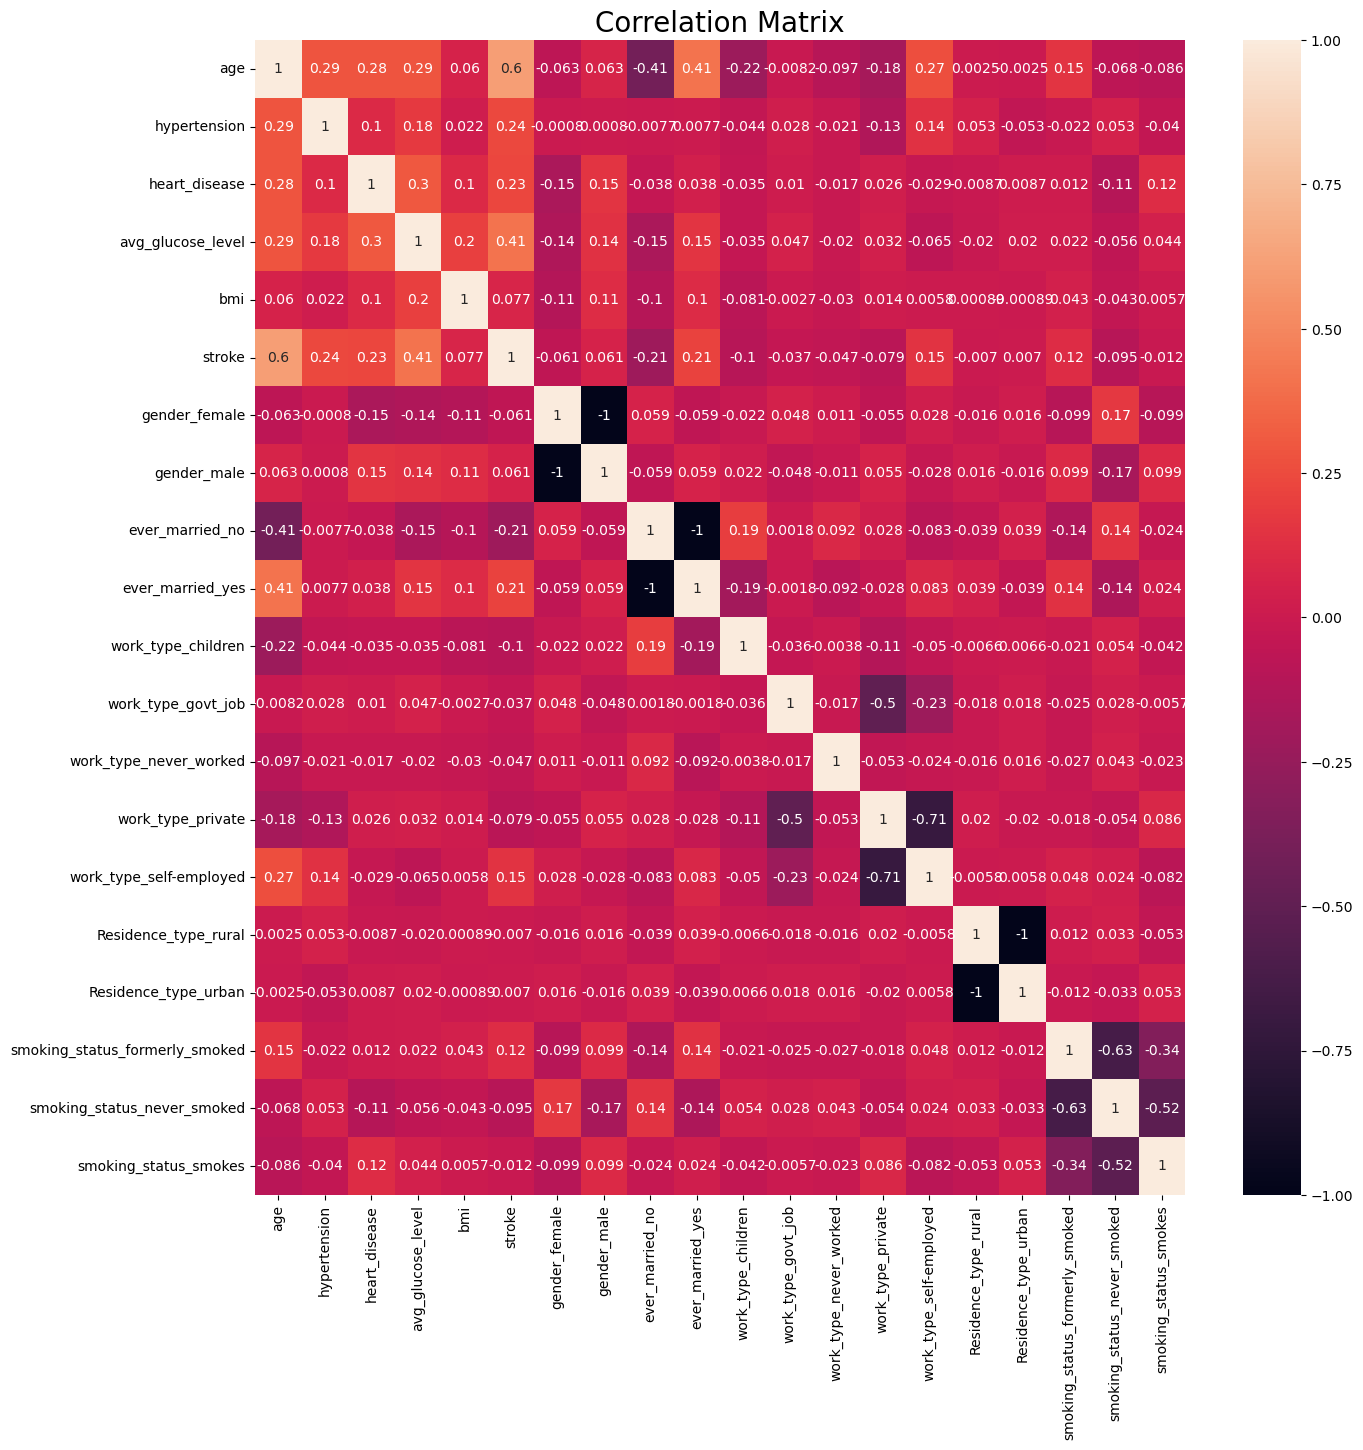

In [46]:
plt.figure(figsize=(15, 15))
sns.heatmap(final.corr(), annot=True);
plt.title('Correlation Matrix', fontsize=20);

> Feature Selection using correlation and Classification Models

In [47]:
final.corr()['stroke'].sort_values(ascending=False)[1:]

age                               0.602633
avg_glucose_level                 0.411051
hypertension                      0.239755
heart_disease                     0.230999
ever_married_yes                  0.213544
work_type_self-employed           0.145387
smoking_status_formerly_smoked    0.115834
bmi                               0.076607
gender_male                       0.061181
Residence_type_urban              0.007043
Residence_type_rural             -0.007043
smoking_status_smokes            -0.012062
work_type_govt_job               -0.036871
work_type_never_worked           -0.047364
gender_female                    -0.061181
work_type_private                -0.079183
smoking_status_never_smoked      -0.095027
work_type_children               -0.099659
ever_married_no                  -0.213544
Name: stroke, dtype: float64

In [48]:
feature_final=final[['age','hypertension',	'heart_disease',	'avg_glucose_level',	'bmi',	'gender_female','gender_male','ever_married_no',	'ever_married_yes',	'work_type_children',	'work_type_govt_job',	'work_type_never_worked',	'work_type_private',	'work_type_self-employed',	'Residence_type_rural',	'Residence_type_urban',	'smoking_status_formerly_smoked',	'smoking_status_never_smoked',	'smoking_status_smokes']]
target=final[["stroke"]]

> Checking Feature Importance using Gradient Boosting and Random Forest Classifier

Checking the importance of features using Random Forest Classifier

<Axes: >

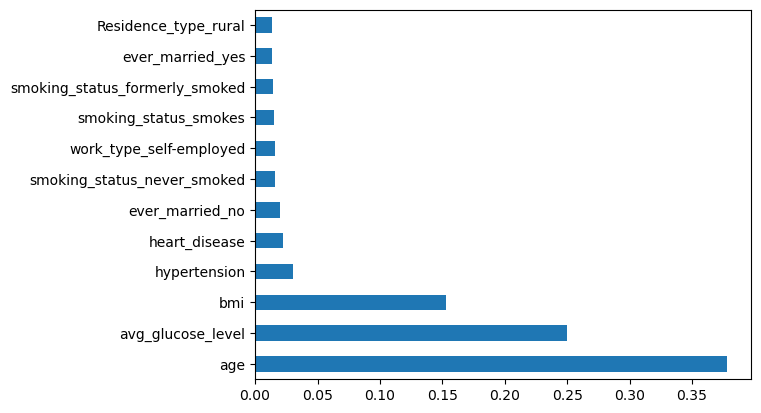

In [49]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
rf = RandomForestClassifier()
rf_model=rf.fit(feature_final,target)
feat_importances = pd.Series(rf_model.feature_importances_, index=feature_final.columns)
feat_importances.nlargest(12).plot(kind='barh')

BMI, Age and Average Glucose Level seems most important features through Random Forest Classifier

Checking the importance of features using Gradient Boosting Classifier

<Axes: >

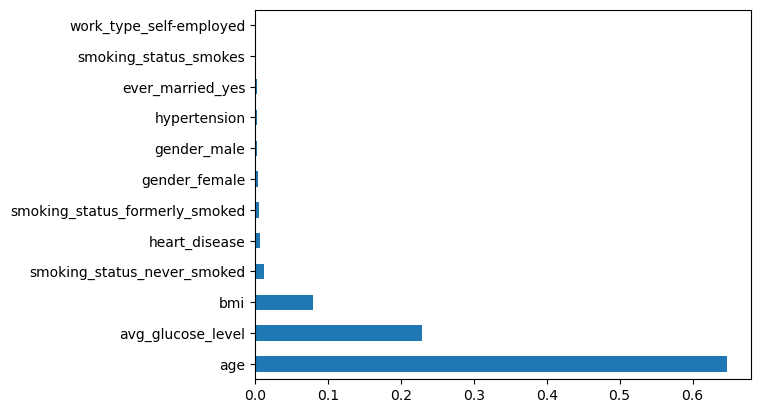

In [50]:
gb = GradientBoostingClassifier()
gb_model=gb.fit(feature_final,target)
feat_importances1 = pd.Series(gb_model.feature_importances_, index=feature_final.columns)
feat_importances1.nlargest(12).plot(kind='barh')

BMI, Age and Average Glucose Level seems most important features through Gradient Boosting Classifier

> Checking for importance of Features acquired through Correlation matrix

In [51]:
Corr_features = final[['age', 'avg_glucose_level', 'bmi','heart_disease','hypertension','ever_married_yes','work_type_self-employed','smoking_status_formerly_smoked']]

In [52]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
rf.fit(Corr_features,target)
gb.fit(Corr_features,target)
print(gb.feature_importances_)
print(rf.feature_importances_)

[0.64458847 0.23861489 0.09422254 0.00657315 0.00356018 0.0037775
 0.00225845 0.00640483]
[0.40371124 0.29927646 0.18542598 0.02367131 0.02719801 0.02512683
 0.01797105 0.01761914]


So the conclusion is that Age, Average Glucose Level and BMI are the most important features and should be considered for Prediction

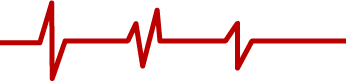
> ## 7- Prediction

In [53]:
final_features=final[['age', 'avg_glucose_level', 'bmi']]
target = final['stroke']

Scaling the features using MinMax Scalar
we must apply the scaling to the test set as well that we are computing for the training set

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(final_features,target,test_size = 0.2,random_state =2)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [55]:
X_train.shape

(4421, 3)

In [56]:
X_test.shape

(1106, 3)

In [57]:
y_train.shape

(4421,)

In [58]:
y_test.shape

(1106,)

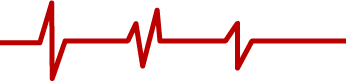
> ## 8- Classification Model Selection

>  **a. Logistic Regfression**

Logistic regression is a statistical technique commonly employed for binary classification tasks, where the objective is to determine whether a given input falls into one of two distinct categories, such as (1 for "cancelled" and 0 for "uncancelled" in your case). This method is widely utilized in the field of machine learning.

In logistic regression, a logistic function is employed to model the relationship between the input features and the likelihood of the target variable belonging to one of the two categories. The logistic function transforms input values into a range between 0 and 1, which can be interpreted as the probability of the target variable being associated with one of the two specified categories.

In [59]:
log_reg = LogisticRegression(C=0.1, max_iter=100).fit(X_train_scaled, y_train)
log_reg_pred= log_reg.score(X_test_scaled, y_test)

print("Training score: {:.3f}".format(log_reg.score(X_train_scaled, y_train)))
print("Test score: {:.3f}".format(log_reg.score(X_test_scaled, y_test)))

log_reg_train_accuracy = log_reg.score(X_train_scaled,y_train)
log_reg_accuracy = log_reg.score(X_test_scaled,y_test)

pred_prob_log_reg = log_reg.predict_proba(X_test_scaled)

#print("Training score: {:.3f}".format(log_reg.score(X_train_scaled, y_train)))
#print("Test score: {:.3f}".format(log_reg.score(X_test_scaled, y_test)))

Training score: 0.795
Test score: 0.802


Confusion Matrix for Logistic Regression

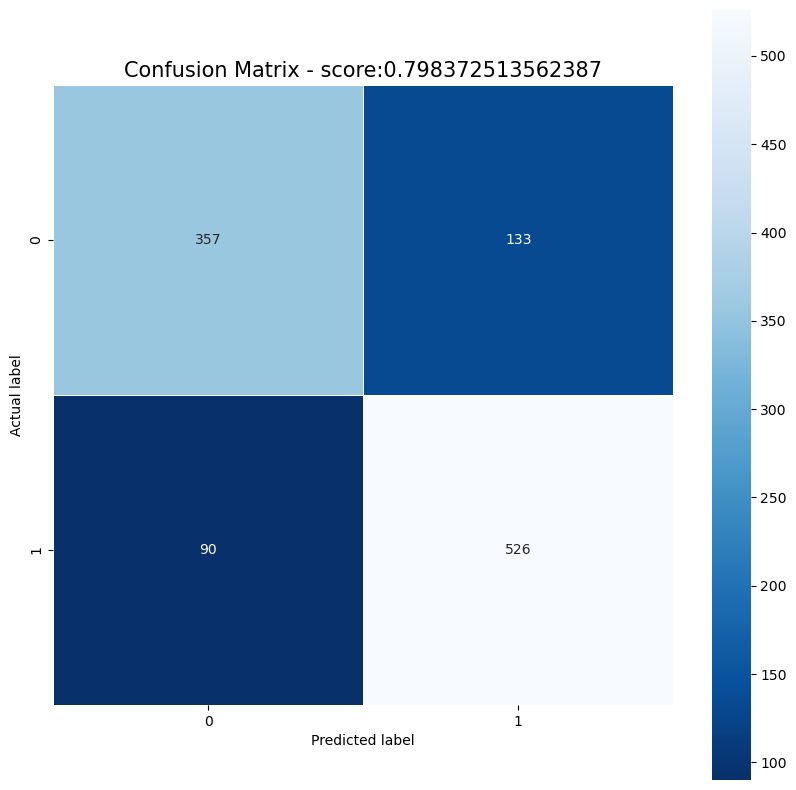

              precision    recall  f1-score   support

           0       0.80      0.73      0.76       490
           1       0.80      0.85      0.83       616

    accuracy                           0.80      1106
   macro avg       0.80      0.79      0.79      1106
weighted avg       0.80      0.80      0.80      1106



In [60]:
log_reg_model=LogisticRegression(random_state=0)
log_reg_model.fit(X_train_scaled,y_train)
y_pred=log_reg_model.predict(X_test_scaled)
from sklearn import metrics

log_reg_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(log_reg_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))

> **b. Decision Tree Classifier** 

A decision tree is a model used in machine learning for classification tasks, employing a tree-like structure. It belongs to the category of supervised learning algorithms and employs a sequence of decisions based on input features to make predictions or decisions.

The decision tree algorithm constructs this tree-like model by iteratively partitioning the dataset into smaller subsets, guided by the values of the input features. At each node of the tree, a decision is made based on the specific feature's value, resulting in the data being divided into two or more subsets according to that feature. This process continues until a predefined stopping condition is met, such as reaching a maximum tree depth or having a minimum number of data points in a leaf node.

Once the decision tree is established, it becomes a tool for making predictions on new, unseen data. This is accomplished by traversing the tree from the root to a leaf node, where the predicted output is found. In classification tasks, these leaf nodes correspond to the predicted class labels.

In [74]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=20,random_state=0).fit(X_train_scaled, y_train)
print(tree.feature_importances_)
tree_pred= tree.score(X_test_scaled, y_test)

tree_train_accuracy =tree.score(X_train_scaled,y_train)
tree_accuracy = tree.score(X_test_scaled,y_test)
pred_prob_tree = tree.predict_proba(X_test_scaled)

print("Training score: {:.3f}".format(tree.score(X_train_scaled, y_train)))
print("Test score: {:.3f}".format(tree.score(X_test_scaled, y_test)))

[0.48638985 0.3415849  0.17202526]
Training score: 1.000
Test score: 0.976


Confusion Matrix using Decision Tree Classifier

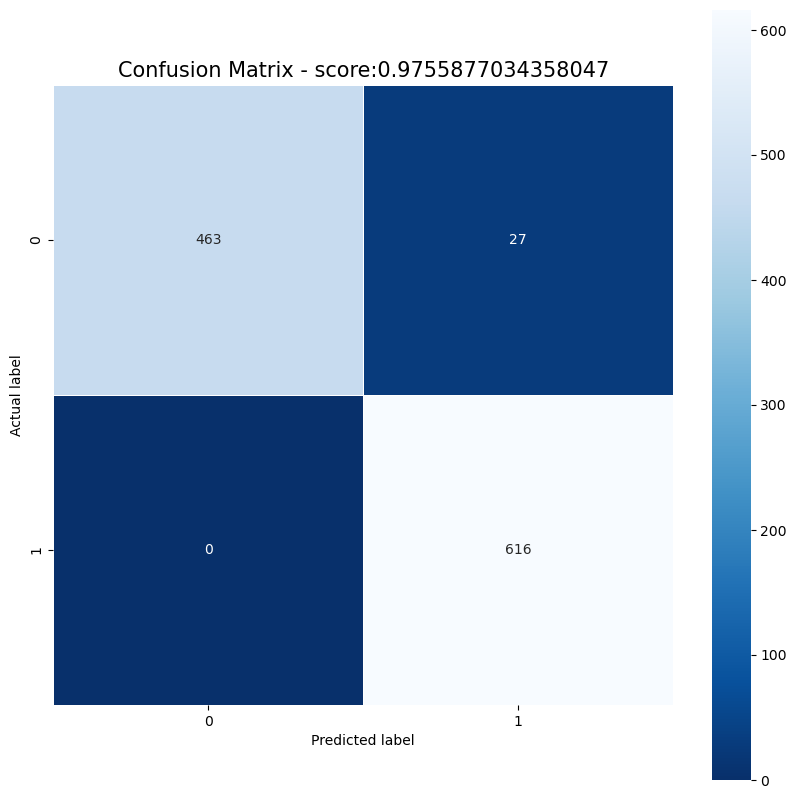

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       490
           1       0.96      1.00      0.98       616

    accuracy                           0.98      1106
   macro avg       0.98      0.97      0.98      1106
weighted avg       0.98      0.98      0.98      1106



In [75]:
tree_model=DecisionTreeClassifier(random_state=0)
tree_model.fit(X_train_scaled,y_train)
y_pred=tree_model.predict(X_test_scaled)
from sklearn import metrics

tree_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(tree_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))

> **c. Support Vector Classifier** 

A Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. It is particularly effective for binary classification problems, where the goal is to separate data points into two classes. SVMs can also be extended for multi-class classification and regression tasks.

The fundamental idea behind SVM is to find a hyperplane that best separates data points of different classes in a high-dimensional feature space. The hyperplane is chosen in such a way that it maximizes the margin, which is the distance between the hyperplane and the nearest data points from each class. These nearest data points are called "support vectors." The margin represents the confidence of the classification, and a larger margin generally indicates a better separation.

In [71]:
svm = SVC(C=100, gamma=0.001).fit(X_train_scaled, y_train)
svm_pred= svm.score(X_test_scaled, y_test)

svm_train_accuracy =svm.score(X_train_scaled,y_train)
svm_accuracy = svm.score(X_test_scaled,y_test)


print("Training score: {:.3f}".format(svm.score(X_train_scaled, y_train)))
print("Test score: {:.3f}".format(svm.score(X_test_scaled, y_test)))


Training score: 0.796
Test score: 0.802


Confusion Matrix using Support Vector Classifier

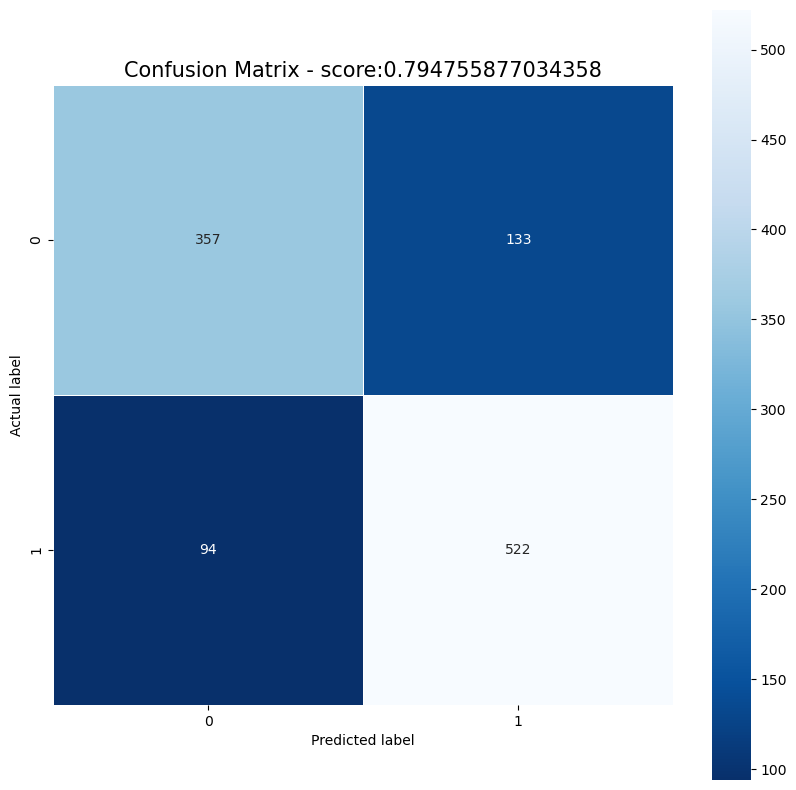

              precision    recall  f1-score   support

           0       0.79      0.73      0.76       490
           1       0.80      0.85      0.82       616

    accuracy                           0.79      1106
   macro avg       0.79      0.79      0.79      1106
weighted avg       0.79      0.79      0.79      1106



In [72]:
svc_model=SVC(random_state=0)
svc_model.fit(X_train_scaled,y_train)
y_pred=svc_model.predict(X_test_scaled)
from sklearn import metrics

svc_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(svc_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))

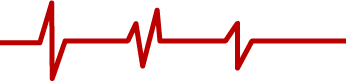
> ## 9- Classification Model Comparision

In [77]:
predictions_acc = { "Model": ['Decision Tree','Support Vector', 'Logistic Regression'],
"Accuracy": [tree_pred ,svm_pred, log_reg_pred]}

In [78]:
model_acc = pd.DataFrame(predictions_acc, columns=["Model", "Accuracy"])

In [79]:
model_acc

,Model,Accuracy
0,Decision Tree,0.975588
1,Support Vector,0.801989
2,Logistic Regression,0.801989


The Decision Tree achieved a higher accuracy of 0.975588 compared to the Logistic Regression's and SVM's accuracy of 0.801989.
Looking at the confusion matrices, we can see that the  Decision Tree did not make any false negative predictions at all. Besides, the Decision Tree misclassified 27 instances, while Logistic Regression and SVM misclassified 133 instances.
Based on the information above, the Decision Tree can make better predictions.
In terms of interpretability, Logistic Regression and SVM are linear model's and they may be easier to interpret compared to the Decision Tree, which is a non-linear model that can capture complex relationships between features. However, the Decision Tree may be more computationally expensive compared to the Logistic Regression and SVM, especially for large datasets.